# HW1 - sklearn

Short description of what this notebook is about

## Preliminaries

In [1]:
# To auto-reload modules in jupyter notebook (so that changes in files *.py doesn't require manual reloading):
# https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython
%load_ext autoreload
%autoreload 2

Import commonly used libraries and magic command for inline plotting

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [99]:
# Import packages for encoding & partitioning data and later regression models
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn import set_config
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [4]:
%matplotlib inline

## Read in file

Read csv of classification dataset file into pandas dataframe to aid with visualizaton of data

In [5]:
housing_df = pd.read_csv("./data/kc_house_data_classification.csv")

## EDA

Look at the data structures and variables and provide visualizations of it

In [6]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
 18  price_

In [7]:
housing_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_gt_1M
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0


In [8]:
# More EDA here
housing_df.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_gt_1M
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,0.069033
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.253515
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,0.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,0.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,0.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000


### ydata-profiling (or pandas-profiling)

In [9]:
# Installed ydataprofiling in command line
# import dataprofiling for deeper EDA

from ydata_profiling import ProfileReport


In [10]:
# move report to profile variable 
profile = ProfileReport(housing_df, title="Profiling Report")

In [ ]:
# view profile in this notebook
# can use this code to print within notebook: profile.to_notebook_iframe()
# But as instructed, printed this report to output folder
profile.to_file("output/EDA_Housing_Data.html")

In [ ]:
# Use SweetViz for more EDA
# pip install at command line
# then import sweetviz, load report with sweetviz to report variable 
# and export report to html file in output folder
import sweetviz
# kept getting errors with this in jupyter notebook and lab
#report = sweetviz.analyze(housing_class_df)
#report.show_html("output/sweetviz_report.html")

## Categorize feature types

Create a list of categorical variables and a list of numeric variables to apply the appropriate pre-processing to each. In the notes we used the data type of the columns to create lists of numeric and categorical variables. Since all the variables will come in as numeric, I need to come up with another way to create lists of the categorical variables and the numeric variables.

Looking at kaggle link of variables, following are numeric(0:4, 9:17)  bedrooms, bathrooms, sqft_living, sqft_lot, floors, sqft_above, sqft_basement, year_built, yr_renovated, lat, long, sqft_living15, sqft_lot15
and categorical (5:8): waterfront, view, condition, grade, zipcode.

### Categorical variables

In [15]:
# Convert catgetorical variables above to object category so read in as non-numeric

housing_df["waterfront"] = housing_df["waterfront"].astype("category")
housing_df["view"] = housing_df["view"].astype("category")
housing_df["condition"] = housing_df["condition"].astype("category")
housing_df["grade"] = housing_df["grade"].astype("category")
housing_df["zipcode"] = housing_df["zipcode"].astype("category")
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   bedrooms       21613 non-null  int64   
 1   bathrooms      21613 non-null  float64 
 2   sqft_living    21613 non-null  int64   
 3   sqft_lot       21613 non-null  int64   
 4   floors         21613 non-null  float64 
 5   waterfront     21613 non-null  category
 6   view           21613 non-null  category
 7   condition      21613 non-null  category
 8   grade          21613 non-null  category
 9   sqft_above     21613 non-null  int64   
 10  sqft_basement  21613 non-null  int64   
 11  yr_built       21613 non-null  int64   
 12  yr_renovated   21613 non-null  int64   
 13  zipcode        21613 non-null  category
 14  lat            21613 non-null  float64 
 15  long           21613 non-null  float64 
 16  sqft_living15  21613 non-null  int64   
 17  sqft_lot15     21613 non-null  

Since we are using regularization, all of the numeric variables will need to rescaled using the StandardScaler. You'll do this later as part of the Pipeline. For any variables that you decide should be treated as categorical in your models, use the OneHotEncoder on them in the preprocessing stage.
Be careful, just because a variable has a numeric datatype in the pandas dataframe, it does not mean that it's necessarily a numeric variable in the context of the classification models. Think about each column and look at your EDA reports and decide whether or not it's truly numeric or needs to be treated as categorical data in the models.
Even though our target variable, price_gt_1M, is categorical, you do NOT need to do any preprocessing on it. As I mentioned in our class notes, scikit-learn will automatically detect that and will do any encoding needed on its own.
Finally, you'll partition the dataset into training and test datasets for modeling:


### Partition the dataset

In [16]:
# Break the housing_df into two separate dataframes and call them X and y, 
# to use in the models. Here's my code for that:
X = housing_df.iloc[:, 0:18]
y = housing_df.iloc[:, 18]

#Partition data to end up ith the same training and test split as class:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

In [17]:
X_train.dtypes

bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront       category
view             category
condition        category
grade            category
sqft_above          int64
sqft_basement       int64
yr_built            int64
yr_renovated        int64
zipcode          category
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
dtype: object

In [18]:
categorical_cols = X_train.select_dtypes(include=['category']).columns.tolist()
categorical_cols

['waterfront', 'view', 'condition', 'grade', 'zipcode']

In [19]:
X_train.loc[:, categorical_cols].describe()

,waterfront,view,condition,grade,zipcode
count,17290,17290,17290,17290,17290
unique,2,5,5,12,70
top,0,0,3,7,98103
freq,17152,15613,11231,7243,484


### Numeric variables

In [20]:
# Next, the remaining variables are numeric as identified above
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()
numeric_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [21]:
X_train.loc[:, numeric_cols].describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.00000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,3.364662,2.109023,2072.679063,1.518280e+04,1.49306,1782.472874,290.206189,1970.919780,84.608329,47.560316,-122.213932,1980.976750,12794.214633
std,0.905820,0.766583,913.241140,4.227845e+04,0.54001,821.985446,443.363580,29.400714,402.140669,0.138581,0.141455,678.019946,27414.965956
min,0.000000,0.000000,290.000000,5.200000e+02,1.00000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.515000,399.000000,651.000000
25%,3.000000,1.500000,1420.000000,5.040000e+03,1.00000,1190.000000,0.000000,1951.000000,0.000000,47.471200,-122.329000,1490.000000,5100.000000
50%,3.000000,2.250000,1900.000000,7.600000e+03,1.50000,1560.000000,0.000000,1975.000000,0.000000,47.572400,-122.231000,1830.000000,7620.000000
75%,4.000000,2.500000,2540.000000,1.065425e+04,2.00000,2200.000000,560.000000,1997.000000,0.000000,47.678400,-122.125000,2350.000000,10080.000000
max,10.000000,8.000000,13540.000000,1.651359e+06,3.50000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


## Logistic Regression

Build a few different logistic regression models using all of the variables in our 
housing dataset using regression csv file. 
For each of these models you will:
* Create a pipeline to do the preprocessing (the scaling and encoding) and the modeling 
* Use different specifications and hyperparameter parameter settings to try
* Score the models on overall accuracy for both the training and test data. Discuss any evidence of overfitting or underfitting as well as how the model does in comparison to the null model.


### SCALING AND ENCODING

In [140]:
# Index of categorized features for later use in regression file
categorical_cols_idx = [X_train.columns.get_loc(c) for c in categorical_cols]
numeric_cols_idx = [X_train.columns.get_loc(c) for c in numeric_cols]

all_cols = X_train.columns.tolist()

categorical_cols_idx
print(type(all_cols))

<class 'list'>


In [144]:
# Check for all features included in either categorical or numeric
#all_cols
all_cols_demo = X_train.columns.tolist()
assert len(all_cols) == len(categorical_cols) + len(numeric_cols), 'each col should either be in categorical or numeric lists'

Steps for Models
1 - Do any required data transformations needed to use LogisticRegression.
2 - Create a LogisticRegression model object and set model options.
3 - Partition our data into training and test data. (done above for feature catgegorization) 
4 - Fit the model.
5 - Score the model on training and test data.

### Creating a Pipeline for Steps 1 and 2

In [24]:
# 1 - Create transformer objects - Scaling and Encoding
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# 2 - Combine transformers into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])


In [25]:
## Model 0  - Null Model
# Classifier model - add null model here 
# 1. Create model
null0_clf = DummyClassifier(strategy="most_frequent")

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf_0 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', null0_clf)])

In [26]:
# This is from the new 1.0 ColumnTransformer example. 
set_config(display='diagram')
clf_0

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'lat',
                                                   'long', 'sqft_living15',
                                                   'sqft_lot15']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['waterfront', 'view',
                                                   'condition', 'grade',
                                                   'zipcode'])])),
                ('classifier', DummyClassifier(strategy='most_frequent'))])

### Steps 3 (Partitioned above) and 4 - Model fitting

In [31]:
# Null model Continued 

# 2. Fit model X_train, X_test, y_train, y_test
clf_0.fit(X_train, y_train)

# 3. Print results 
print(f"Training score: {clf_0.score(X_train, y_train):.3f}")
print(f"Test score: {clf_0.score(X_test, y_test):.3f}")

# Commented out saving test output to df for output file
#df_null_model0_testprobs = pd.DataFrame(null_model0_testprobs) # add back?? columns=targets index=test_df.index

Training score: 0.933
Test score: 0.924


The result is about 93% for our training data so that is our baseline to compare our more informed models against. Based on the EDA I did earlier, this is the expected result since 20,121 / 21,613 of the homes or 93% of the targets were null for the target, or 0 which indicates a home price less than $1M. The result for the test data is about the same as the training data and only slightly lower as expected without any signs of over or underfitting.

### Model 1: Ridge regression with C=1.0

In [41]:
# Model 1: Ridge regression with C=1.0
# penalty='l2' --> ridge
# C = 1 --> balanced weights on residuals and regularization penalty
# solver='saga' --> required but this means ??

# 1. Create model
# Classifier model
clf_model_1 = LogisticRegression(penalty='l2', C=1, solver='saga', max_iter=2000)

# Append classifier to preprocessing pipeline.
clf_m1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model_1)])

# 2. Fit model on training data 
clf_m1.fit(X_train, y_train)

#  3. Print the results for training and test data
print(f"Training score: {clf_m1.score(X_train, y_train):.3f}")
print(f"Test score: {clf_m1.score(X_test, y_test):.3f}")


Training score: 0.974
Test score: 0.971


My initial Ridge model did not converge at 500 iterations but using the suggested 2000 iterations fixed that issue. We see that Training results did better than the null model with a 97.4% accuracy as well as the Test data performing better in this model at 97.1% (vs 92.4% with the null model). There aren't any signs of overfitting or underfitting as Training did better than Test data but only slightly better.

#### Confusion matrices for Training and Test data - Model 1

Also, create a plot of the coefficients with one set of coefficients (since we have a binary classification problem).

Confusion matrix for train, without normalization-Ridge
[[15984   143]
 [  314   849]]
Normalized confusion matrix for train
[[0.99113288 0.00886712]
 [0.2699914  0.7300086 ]]


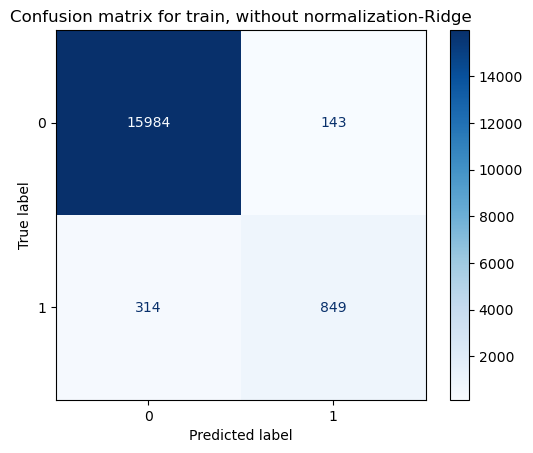

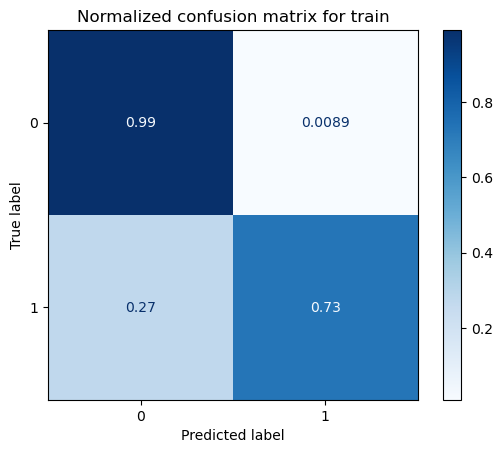

In [247]:
# Confusion Matrix for Training 
titles_options = [("Confusion matrix for train, without normalization-Ridge", None),
                  ("Normalized confusion matrix for train", 'true')]

class_names = clf_m1['classifier'].classes_

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(clf_m1, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix for test, without normalization
[[3961   33]
 [  94  235]]
Normalized confusion matrix for test
[[0.99173761 0.00826239]
 [0.28571429 0.71428571]]


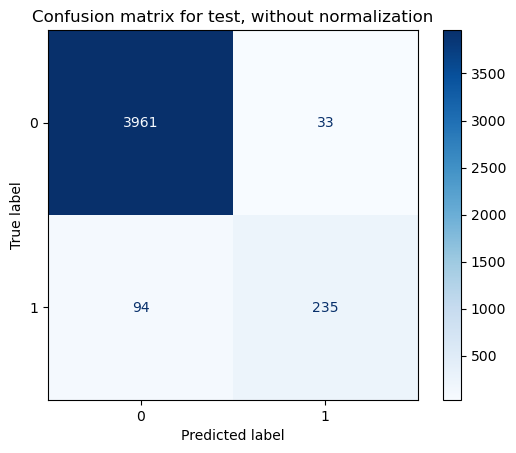

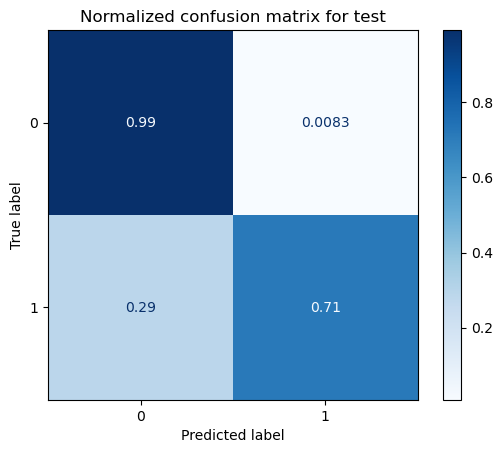

In [248]:
titles_options = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

class_names = clf_m1['classifier'].classes_

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(clf_m1, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

The Confusion matrices show the same conclusion: Test data does only slightly worse than Train but does not show overfitting. The biggest confusion over accurately predicting the target for both datasets is classifying the over 1M home, with slightly better results with Train. The Rige model 1 also predicts both of our True and False (less and more than $1M respectively) more accurately than the Null model 0. 

#### Plot of Coefficients for Model 1 Ridge Regression

In [51]:
clf_m1.named_steps['classifier'].coef_.shape

(1, 107)

In [52]:
clf_m1.steps[1]

('classifier', LogisticRegression(C=1, max_iter=2000, solver='saga'))

In [245]:
# Plot the coefficients
def coef_plot(model, title=None):  
    # remove this part
    # fig, ax = plt.subplots(1, sharex=True)

    #plot for 1 set of coefficients:
    coef_plot = model.steps[-1][1].coef_ 
    coef_plot = coef_plot[0]
    plt.figure(figsize=(6, 2))
    plt.plot(coef_plot)
    if title:
        plt.title(title)
    plt.tight_layout()

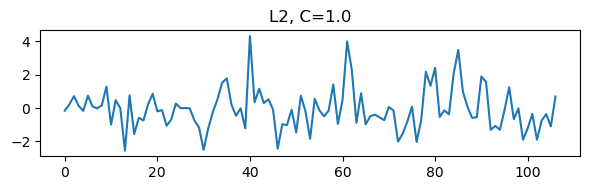

In [246]:
coef_plot(clf_m1, 'L2, C=1.0')
plt.show()

In terms of the coefficient plot,>????? we see that Training results did better than the null model with a 97.4% accuracy as well as the Test data performing better in this model at 97.1% (vs 92.4% with the null model). 

### Model 2: Lasso regression with C=1.0

In [48]:
# Model 2: Lasso regression with C=1.0
# penalty='l1' -->  Lasso
# C = 1 --> balanced weights on residuals and regularization penalty
# solver='saga' --> required but this means ??

# 1. Create model
# Classifier model
clf_model_2 = LogisticRegression(penalty='l1', C=1, solver='saga', max_iter=2000)

# Append classifier to preprocessing pipeline.
clf_m2 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model_2)])

# 2. Fit model on training data 
clf_m2.fit(X_train, y_train)

#  3. Print the results for training and test data
print(f"Training score: {clf_m2.score(X_train, y_train):.3f}")
print(f"Test score: {clf_m2.score(X_test, y_test):.3f}")


Training score: 0.974
Test score: 0.970


Compared to the Ridge regression model, Lasso's C=1.0 model performs the same on the Training data with both at 97.4% accuracy but fares slightly worse on Test with 97.0% vs Ridge's 97.1%.

#### Confusion matrices for Training and Test data - Model 2 Lasso Reg C=1.0

Confusion matrix for train, without normalization-Lasso
[[15977   150]
 [  296   867]]
Normalized confusion matrix for train
[[0.99069883 0.00930117]
 [0.25451419 0.74548581]]


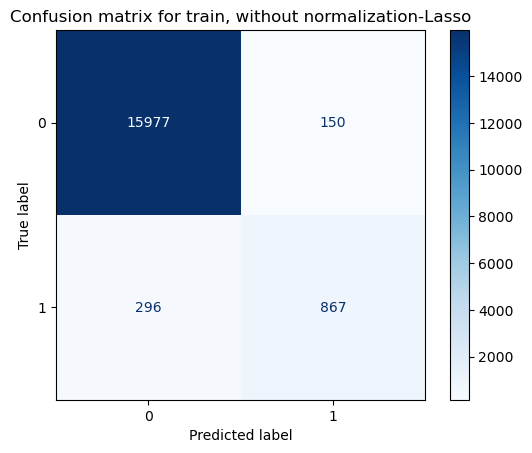

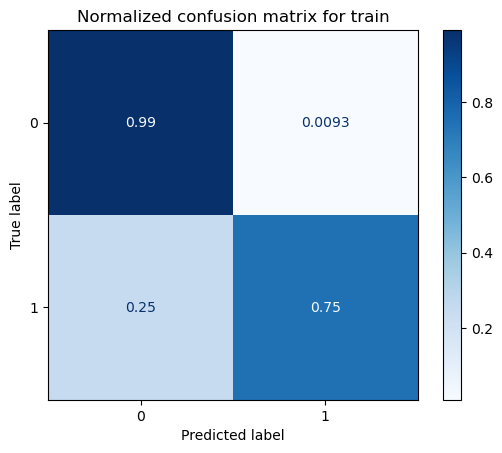

In [249]:
# Confusion Matrix for Training 
titles_options = [("Confusion matrix for train, without normalization-Lasso", None),
                  ("Normalized confusion matrix for train", 'true')]

class_names = clf_m2['classifier'].classes_

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(clf_m2, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix for test, without normalization
[[3957   37]
 [  92  237]]
Normalized confusion matrix for test
[[0.9907361  0.0092639 ]
 [0.27963526 0.72036474]]


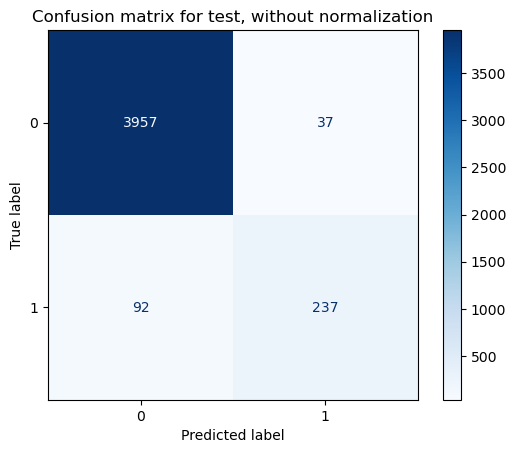

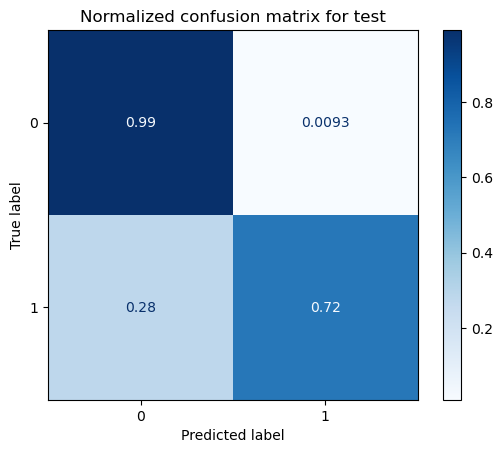

In [250]:
titles_options = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

class_names = clf_m2['classifier'].classes_

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(clf_m2, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

The confusion matrices echo the score results: Compared to the Ridge regression model, Lasso's C=1.0 model performs very closely on the Training data as it does for the Test data and about the same as the Ridge model but accurately predicts a few more Trues and Falses for Train and Test, but only slightly, so not a huge improvement.

#### Plot of Coefficients for Model 2 Lasso Regression C=1.0

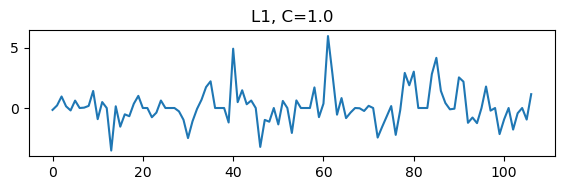

In [210]:
coef_plot(clf_m2, 'L1, C=1.0')
plt.show()

The low regularization on this Lasso model with C=1.0 shows that regularization might not be affecting the performance of the model. In the next model with  higher regularization and a lower C=0.01, we can see if this is true. 

### Model 3: Lasso regression with C=0.01

In [68]:
# Model 3: Lasso regression with C=0.01
# penalty='l1' -->  Lasso
# C = .01 --> means ??balanced weights on residuals and regularization penalty
# solver='saga' --> required but this means ??

# 1. Create model
# Classifier model
clf_model_3 = LogisticRegression(penalty='l1', C=0.01, solver='saga', max_iter=2000)

# Append classifier to preprocessing pipeline.
clf_m3 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model_3)])

# 2. Fit model on training data 
clf_m3.fit(X_train, y_train)

#  3. Print the results for training and test data
print(f"Training score: {clf_m3.score(X_train, y_train):.3f}")
print(f"Test score: {clf_m3.score(X_test, y_test):.3f}")

Training score: 0.954
Test score: 0.950


/opt/anaconda3/envs/aap/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


While this lasso model with C=0.01 did not converge, it still provided scores which show a much poorer performance on Train and Test data with accuracy of 95.4% and 95.0% respectively. It looks high regularization does not mainfest in a better performing model. There is definitely not underfitting as the accuracy scores are good and it doesn't exhibit overfitting as the model performs about the same on both Train and Test data. Increasing the penalty by increasing regularization (our C value) did not improve the model so it did not improve feature selection through the adjusted weights.

#### Confusion matrices for Training and Test data - Model 3 Lasso C=0.01

Confusion matrix for train, without normalization-Lasso
[[16001   126]
 [  672   491]]
Normalized confusion matrix for train
[[0.99218702 0.00781298]
 [0.57781599 0.42218401]]


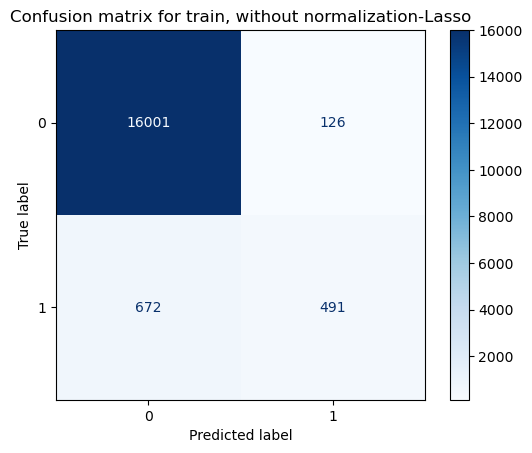

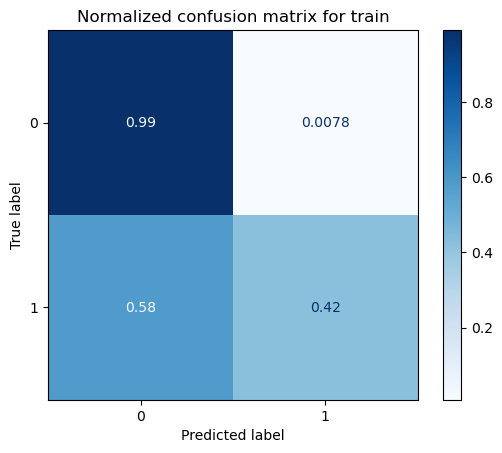

In [251]:
# Confusion Matrix for Training 
titles_options = [("Confusion matrix for train, without normalization-Lasso", None),
                  ("Normalized confusion matrix for train", 'true')]

class_names = clf_m3['classifier'].classes_

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(clf_m3, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix for test, without normalization
[[3964   30]
 [ 186  143]]
Normalized confusion matrix for test
[[0.99248873 0.00751127]
 [0.56534954 0.43465046]]


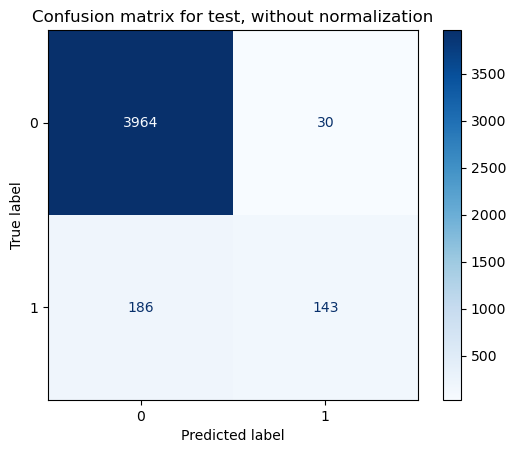

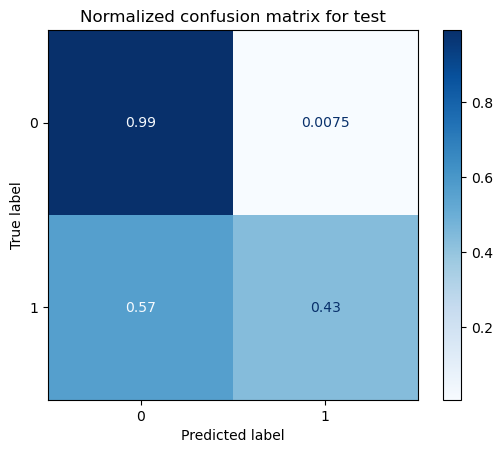

In [87]:
titles_options = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

class_names = clf_m3['classifier'].classes_

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(clf_m3, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Model 3 of Lasso with a low C value is less accurate in predicting the homes over $1M or True. The Actual = predicted values for our targets of greater or less than 1M price has gone down for each in this model, showing it's performing not as well. It's not overfitting the data as seen in accuracy scores above but it's becoming less accurate in predicting the more expensive (> 1M) homes and only slightly better at less expensive ones, but overall not more accurate.

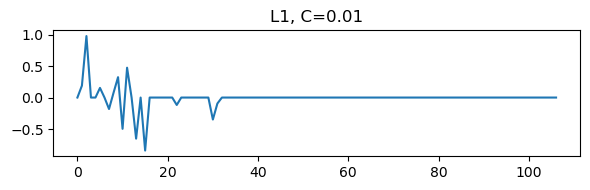

In [211]:
coef_plot(clf_m3, 'L1, C=0.01')
plt.show()

In this model of Lasso regression with C=0.01, we enforced a high level of regularization to look at whether it's having an effect on the coefficients, which it is, and it appears to not help with accuracy especially compared to the first 2 models with less regularization using C=1.0. Here, we can see the coefficients are being driven to 0

### Model 4: Lasso regression with optimal C value

In [81]:
# # Model 4: Lasso regression with optimal C
# penalty='l1' -->  Lasso
# C = ?? --> balanced weights on residuals and regularization penalty
# solver='saga' -->  supports non-smooth penalty L1 (Regularization), senstive to feature scaling

# 1. Create model
# Classifier model
# Define list of Cs to use in model
Cs = [0.001, 0.01, 0.1, 1, 10, 100]
clf_model_4 = LogisticRegressionCV(penalty='l1', Cs=Cs, solver='saga', max_iter=2000) 

# Append classifier to preprocessing pipeline.
clf_m4 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model_4)])

# 2. Fit model on training data 
clf_m4.fit(X_train, y_train)

#  3. Print the results for training and test data
print(f"Training score: {clf_m4.score(X_train, y_train):.3f}")
print(f"Test score: {clf_m4.score(X_test, y_test):.3f}")

/opt/anaconda3/envs/aap/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/aap/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/aap/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/aap/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training score: 0.975
Test score: 0.972


In [84]:
# Print the optimal C value
print("Optimal C value:", clf_model_4.C_)

Optimal C value: [10.]


Using LogisticRegressionCV to fit a model allows sklearn to determine the optimal C value to use. The model did well on Training and Test and did the best of all models, with Training at 97.5% and Test 97.2% - both good scores and no signs of over or underfitting. This model 4 also finally beats the null model of {Training 97.4%, Test 97.1%}. Although the model didn't converge, optimal C value was 10 which can be interpreted as regularization does not help with modeling.  

#### Confusion matrices for Training and Test data - Model 4 Lasso with Optimal C

Normalized confusion matrix for train
[[0.99218702 0.00781298]
 [0.57781599 0.42218401]]


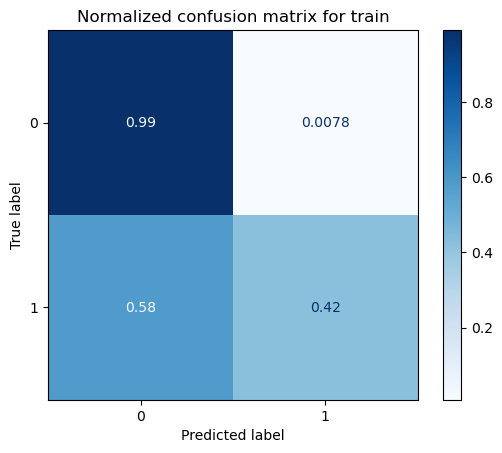

In [124]:
# Confusion Matrix for Training 
#titles_options = [("Confusion matrix for train, without normalization-Lasso", None),
#                  ("Normalized confusion matrix for train", 'true')]
title = "Normalized confusion matrix for train"
#class_names = clf_m3['classifier'].classes_

#for title, normalize in titles_options:
disp = ConfusionMatrixDisplay.from_estimator(clf_m3, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

plt.show()

Normalized confusion matrix for test
[[0.9907361  0.0092639 ]
 [0.25835866 0.74164134]]


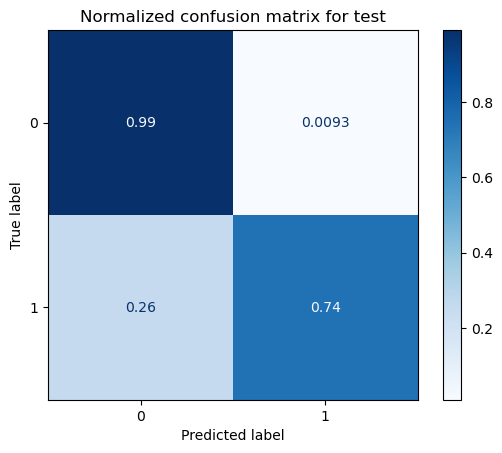

In [125]:
#titles_options = [("Confusion matrix for test, without normalization", None),
#                  ("Normalized confusion matrix for test", 'true')]

#class_names = clf_m4['classifier'].classes_
title = "Normalized confusion matrix for test"
#for title, normalize in titles_options:
disp = ConfusionMatrixDisplay.from_estimator(clf_m4, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

plt.show()

The Confusion matrix shows the model is peforming better on the Test data than Train as seen in better accuracy on the True or > $1M homes: 74% vs 42% for Train. Since it did not converge, it's likely that the model is underfitting the data.

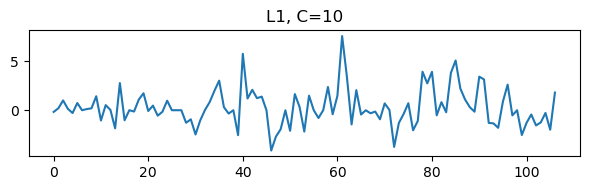

In [212]:
coef_plot(clf_m4, 'L1, C=10')
plt.show()

*** Summarize Model 4 - Optimal C- The plot isn't showing much difference with models 1 & 2 BUT ????

## Task 5 - Simple decision tree

In [136]:
# # Model 5: Simple Decision Tree

# 1. Create model
# Classifier model
clf_model5 = tree.DecisionTreeClassifier(max_depth=4)

# Append classifier to preprocessing pipeline.
clf_m5= Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model_5)])

# 2. Fit model on training data 
clf_m5.fit(X_train, y_train)

#  3. Print the results for training and test data
print(f"Training score: {clf_m5.score(X_train, y_train):.3f}")
print(f"Test score: {clf_m5.score(X_test, y_test):.3f}")

Training score: 1.000
Test score: 0.960


Normalized confusion matrix for test
[[1. 0.]
 [0. 1.]]


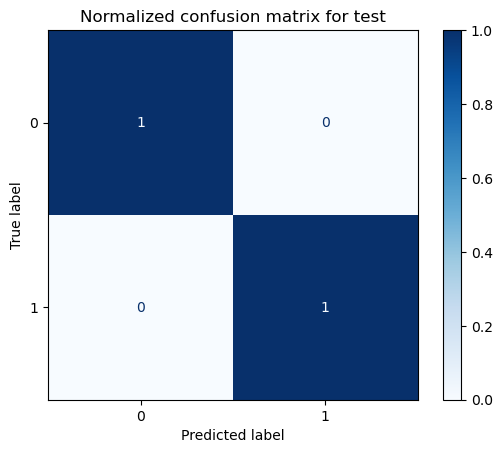

In [256]:
# Confusion Matrix for Training 
titles_options = [("Confusion matrix for train, without normalization-Lasso", None),
                  ("Normalized confusion matrix for train", 'true')]
                 
class_names = clf_m3['classifier'].classes_

#for title, normalize in titles_options:
disp = ConfusionMatrixDisplay.from_estimator(clf_m5, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

plt.show()

Normalized confusion matrix for test
[[0.97871808 0.02128192]
 [0.2674772  0.7325228 ]]


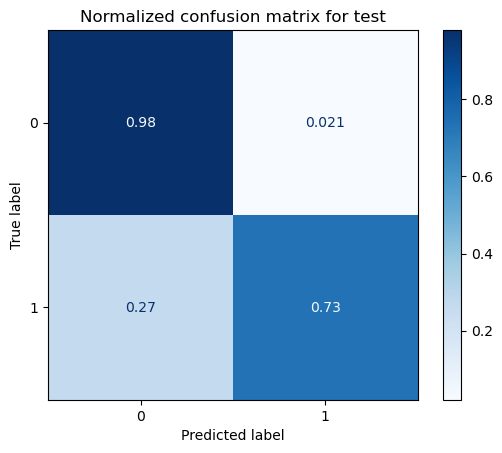

In [258]:
titles_options = [("Confusion matrix for test, without normalization", None),
                 ("Normalized confusion matrix for test", 'true')]

class_names = clf_m5['classifier'].classes_
title = "Normalized confusion matrix for test"
#for title, normalize in titles_options:
disp = ConfusionMatrixDisplay.from_estimator(clf_m5, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize
                                )
disp.ax_.set_title(title)

print(title)
print(disp.confusion_matrix)

plt.show()

Model 6 Decision Tree's confusion matrix shows the overfitting more visibly. The train data is predicted at 100% for our target but does not show the same performance for the test data with 97.8 accuracy for less expenses home and even worse for more expensive homes (True=1) at 73% - a whole 27% less accuracy than train.

### Hacker Extra

Display the fitted tree so that it's readable. :) Does this count?

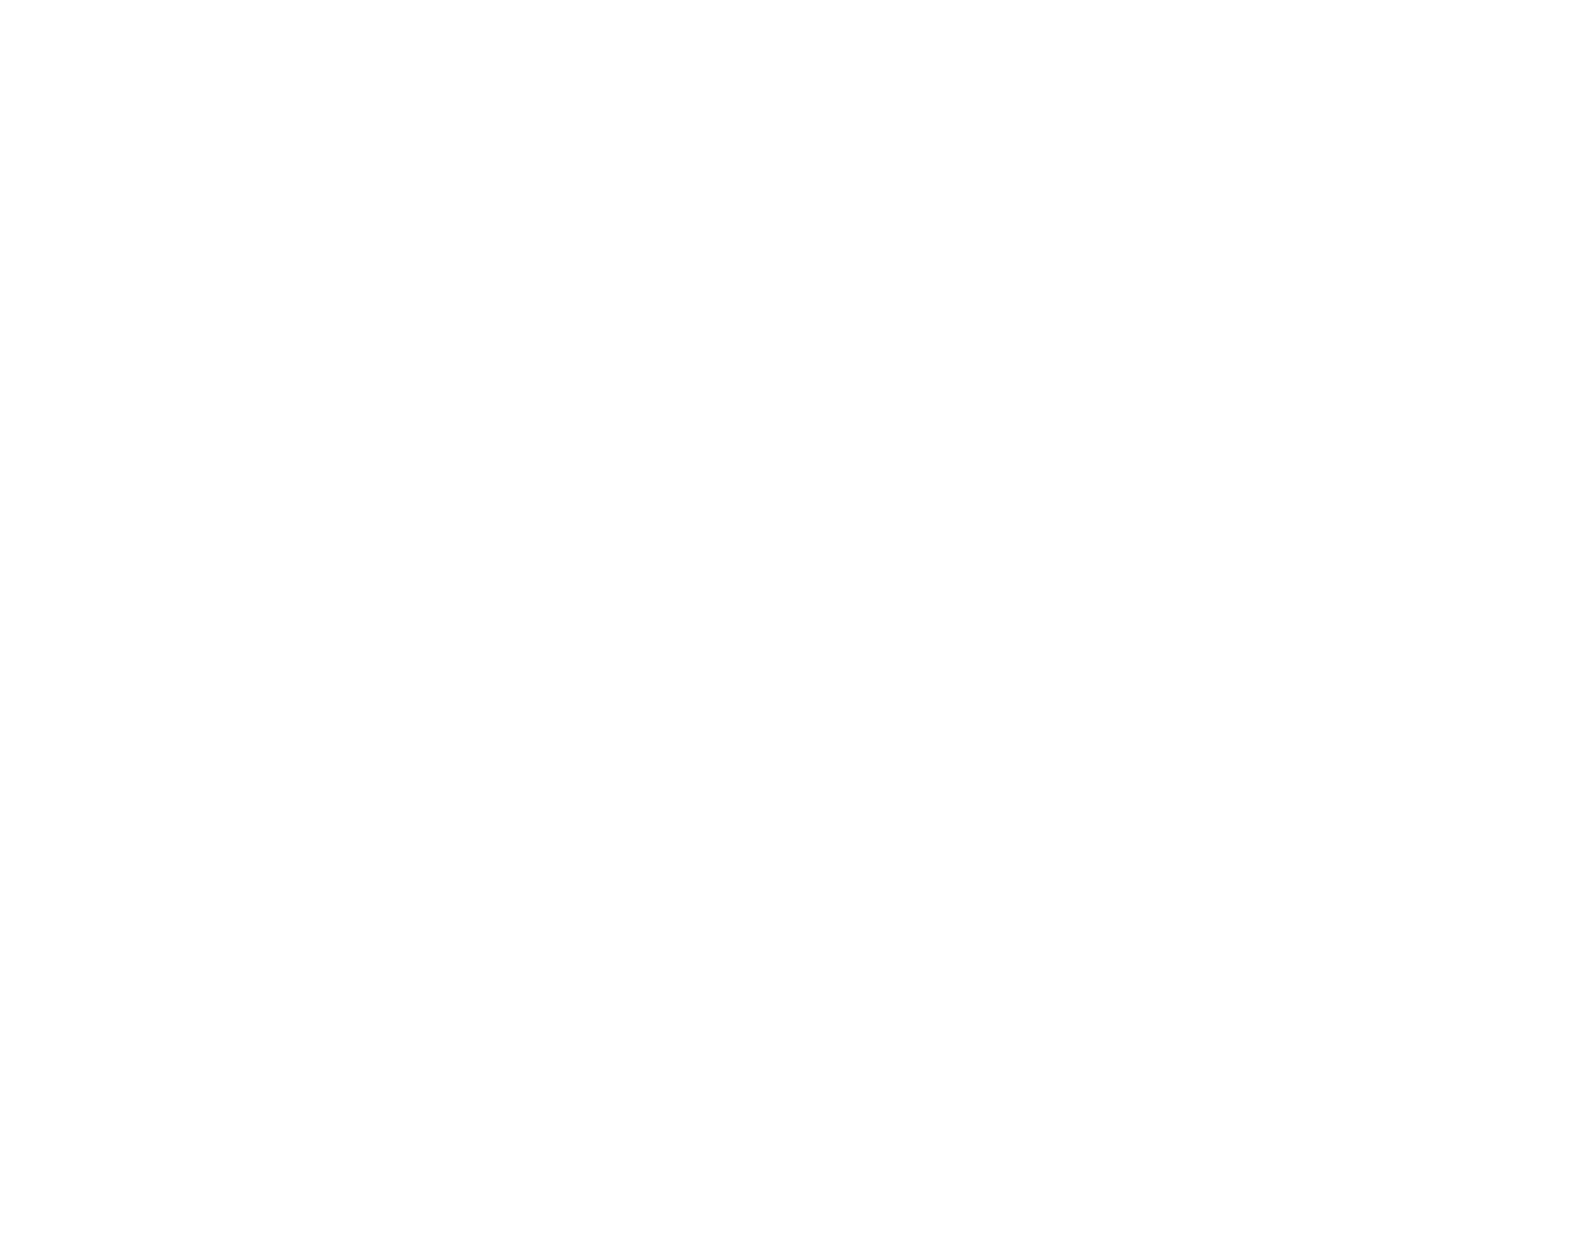

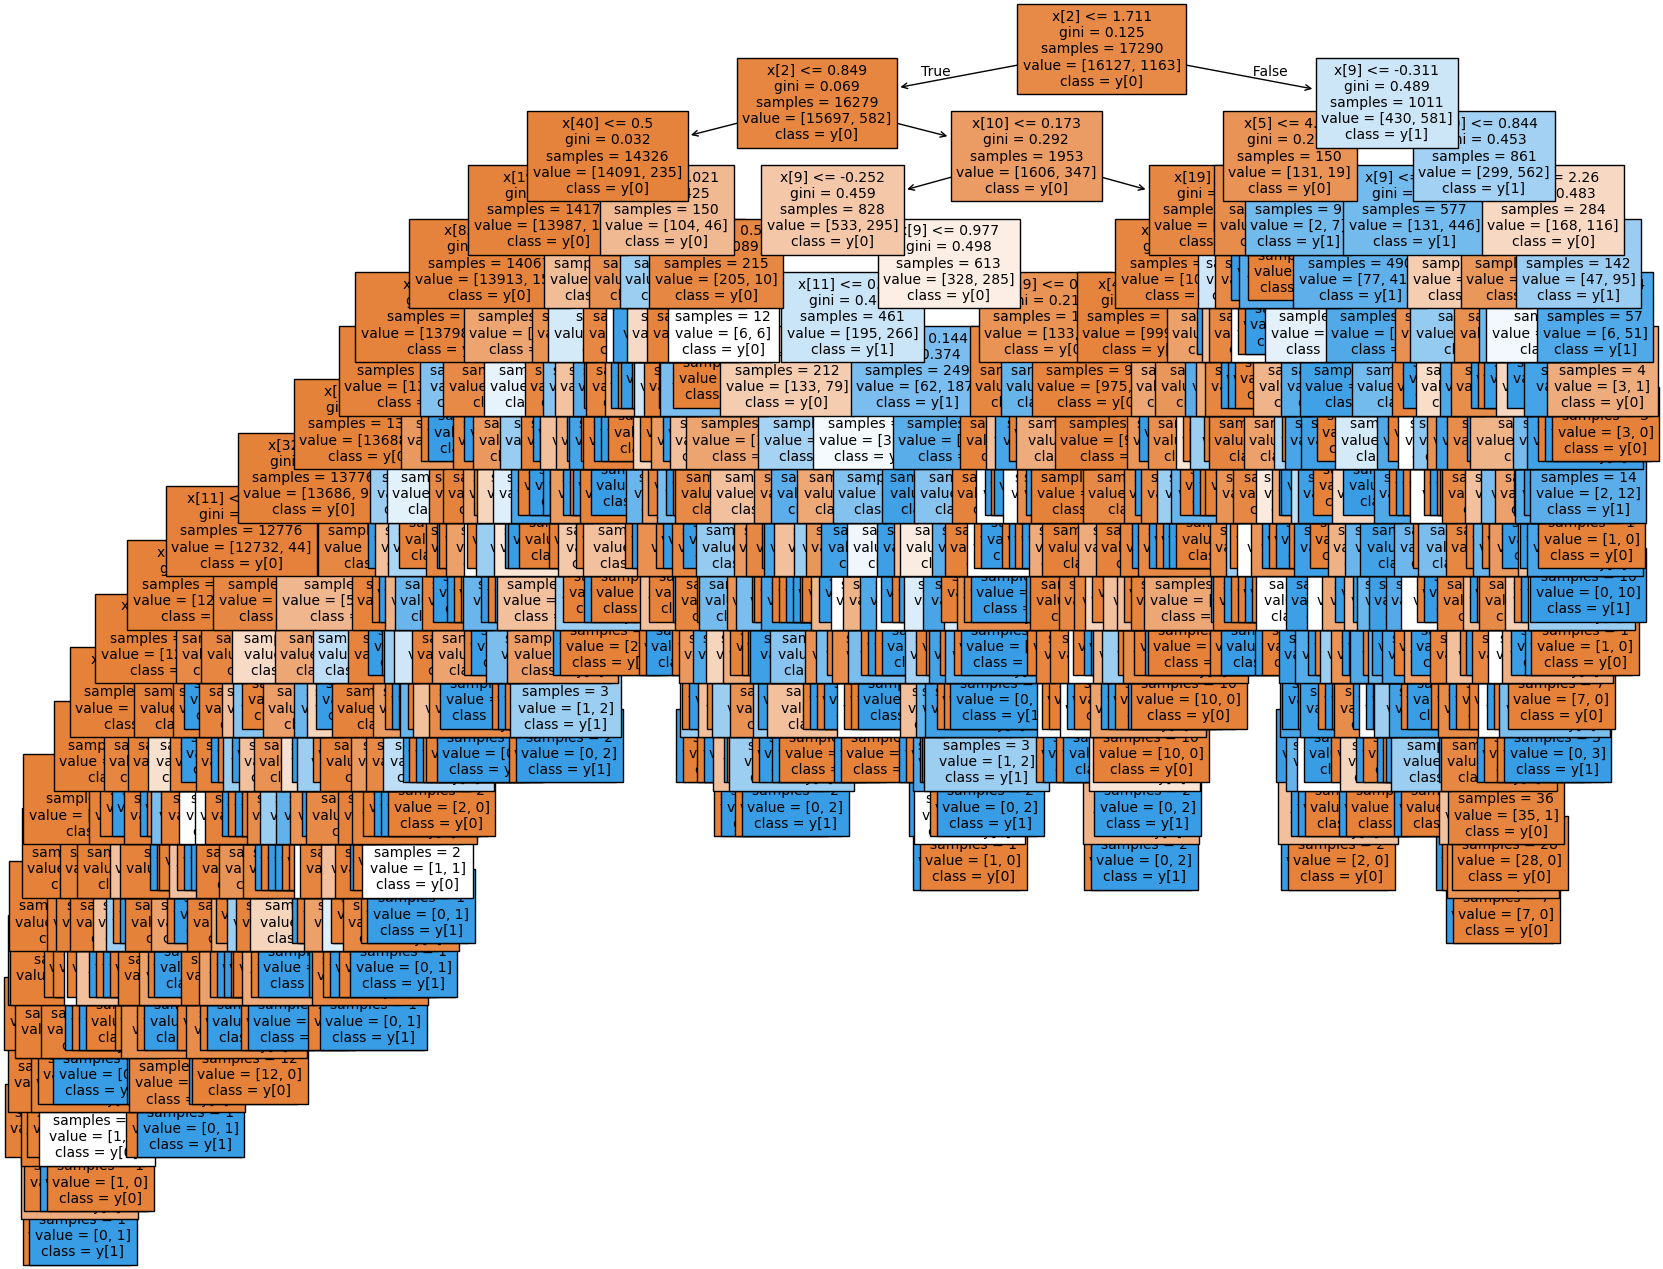

In [145]:
# Extract decision tree
tree_model = clf_m5.named_steps['classifier']

# Plot tree
plt.figure(figsize=(20, 16))
plot_tree(tree_model, filled=True, class_names=True, fontsize=10)
plt.show()

## Task 6 - a little error exploration (more challenging)

In [ ]:
# First, read in the regression csv file to pandas dataframe
housing_reg_df = pd.read_csv("./data/kc_house_data_regression.csv")

# ???? recreate categ & numeric col for regression data
housing_reg_df["waterfront"] = housing_reg_df["waterfront"].astype("category")
housing_reg_df["view"] = housing_reg_df["view"].astype("category")
housing_reg_df["condition"] = housing_reg_df["condition"].astype("category")
housing_reg_df["grade"] = housing_reg_df["grade"].astype("category")
housing_reg_df["zipcode"] = housing_reg_df["zipcode"].astype("category")
housing_reg_df.info()

In [ ]:
# DO I need to this?? I only need y target price with same split as earlier Class csv
# Break the housing_df into two separate dataframes and call them X and y, 
# to use in the models. Here's my code for that:
X_r = housing_reg_df.iloc[:, 0:17]
y_r = housing_reg_df.iloc[:, 17]

#Partition data to end up ith the same training and test split as class:

Xr_train, Xr_test, yr_train, yr_test = train_test_split(X, y, test_size=0.2, random_state=73)

In [149]:
# Make predictions on the test data
clf_LR_results = clf_m2.predict(X_test)
print(clf_LR_results[:10])  # Print out first 10
# figure out way to include index for X_test so can match below??

[0 0 0 0 0 0 0 0 0 0]


In [155]:
# need to compare above to true target - read in y_Test same rows
print(y_test[:10])
# then where these 2 aren't equal - using index?? - find out what price is in other csv file
print(type(y_test))

13473    0
9626     0
21376    0
9036     0
1007     0
3294     0
18747    0
13705    0
4404     0
17853    0
Name: price_gt_1M, dtype: int64
<class 'pandas.core.series.Series'>


One way to visualize this is to create a histogram of the actual prices only for those rows in test that we got wrong. What makes this tricky? A few things:
•	As I already mentioned, price is not in our original data but is in the kc_house_data_regression.csv dataset. Remember, other than the target variable, this dataset is identical (including the index) to the one we used above for classification.
•	We partitioned the classification dataset into training and test datasets.
•	In order to create the histogram, we simply need a Series (or array) of price values corresponding to the predictions in test that we got wrong.

•	The pandas join method will come in handy.
•	The pandas .loc selector can take a boolean array as an input for selecting rows or columns. Using one to select rows is quite useful for this problem.
